In [83]:
# import all required library for exploratory data analysis on Social Network ads data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Loading the Dataset
Data = pd.read_csv(r"C:\Users\Vinoth\Dropbox\PC\Desktop\HOPE AI\Machine Learning\Classification_Models\DataSets\Social_Network_Ads.csv")

In [85]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [86]:
Data.shape

(400, 5)

In [87]:
# From the above data set we got to know it is an classification problem lets see how many classes are there in Output variable

Data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [88]:
# Lets see if there is any null data in data set
Data[Data.isnull().all(axis=1)]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [89]:
# Lets see if there is any NA data in data set
Data[Data.isna().all(axis=1)]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [90]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [91]:
# Lets convert the "Gender" Nominal category column to numerical values using one-hot-encoding via pandas get dummies method

Data = pd.get_dummies(Data,drop_first=True)

In [92]:
Data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [93]:
Data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [94]:
# Lets rearrange the columns for better visualization
Data = Data.loc[:,['Gender_Male','Age','EstimatedSalary','Purchased']]

In [95]:
Data

,Gender_Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


C:\Users\Vinoth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Age vs Purchased')]

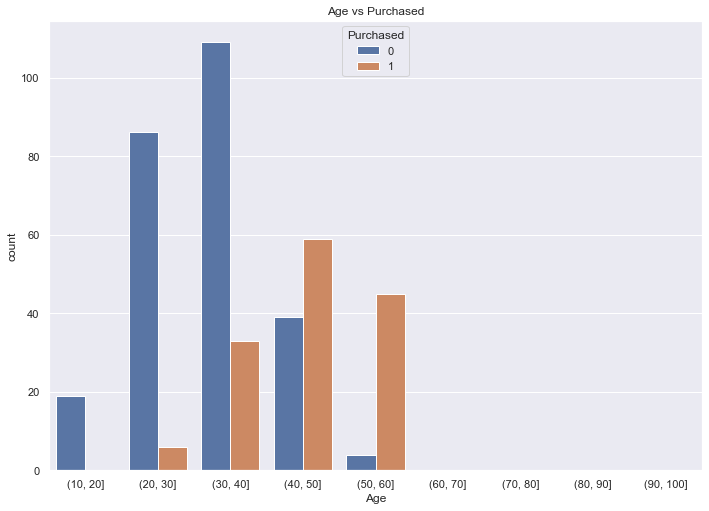

In [110]:
# Relation between "Age" and "Purchased"
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(pd.cut(Data['Age'], bins=range(10,101,10)), hue = Data['Purchased']).set(title="Age vs Purchased")

C:\Users\Vinoth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Gender_Male vs Purchased')]

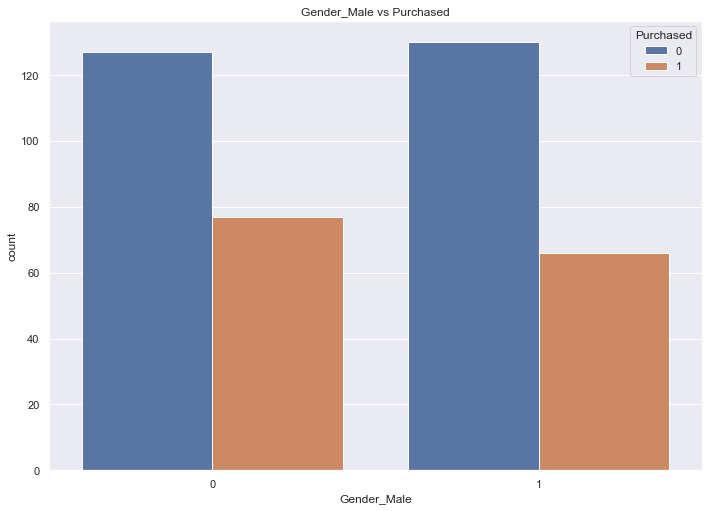

In [112]:
# Relation between "Gender" and "Purchased"
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(Data['Gender_Male'], hue = Data['Purchased']).set(title="Gender_Male vs Purchased")

C:\Users\Vinoth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='Age'>

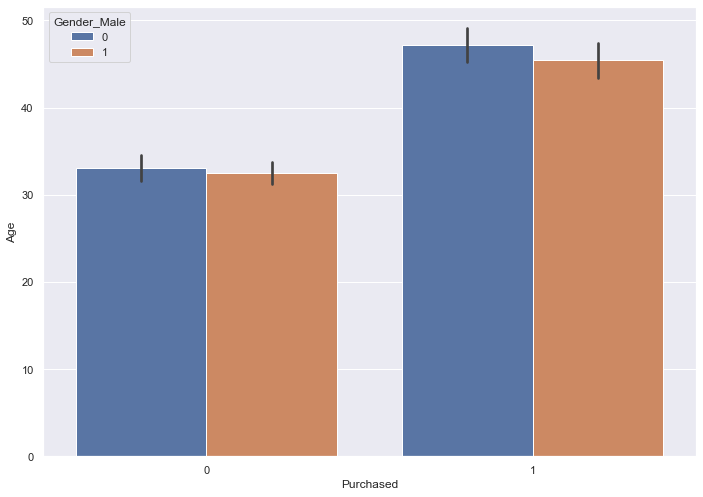

In [114]:
sns.barplot(Data['Purchased'], Data['Age'], hue = Data["Gender_Male"])